In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## Load and inspect data

In [2]:
xmr_df = pd.read_csv(Path('../../resources/prices/coin_Monero.csv'), index_col='SNo')
xmr_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Monero,XMR,2014-05-22 23:59:59,2.188880,1.359090,1.589400,2.095580,1.329180e+05,1.855608e+06
2,Monero,XMR,2014-05-23 23:59:59,3.434370,2.051040,2.051040,2.963020,2.668520e+05,2.692180e+06
3,Monero,XMR,2014-05-24 23:59:59,4.014240,2.617780,2.920390,3.702450,2.480280e+05,3.456658e+06
4,Monero,XMR,2014-05-25 23:59:59,4.043030,2.803300,4.043030,3.138560,2.835450e+05,2.993339e+06
5,Monero,XMR,2014-05-26 23:59:59,3.762350,2.312020,3.218970,3.021860,2.201480e+05,2.946133e+06
...,...,...,...,...,...,...,...,...,...
2469,Monero,XMR,2021-02-23 23:59:59,225.015462,171.288990,224.992714,219.531057,1.161681e+09,3.917993e+09
2470,Monero,XMR,2021-02-24 23:59:59,224.976032,198.768041,219.575963,205.749129,8.610354e+08,3.672199e+09
2471,Monero,XMR,2021-02-25 23:59:59,218.282977,197.548116,205.743357,197.548116,6.282454e+08,3.526000e+09


In [3]:
xmr_df['Date'] = pd.to_datetime(xmr_df['Date']).dt.date
xmr_df['Date'] = pd.to_datetime(xmr_df['Date'])
xmr_df['Spread'] = xmr_df.High - xmr_df.Low
xmr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2473 entries, 1 to 2473
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       2473 non-null   object        
 1   Symbol     2473 non-null   object        
 2   Date       2473 non-null   datetime64[ns]
 3   High       2473 non-null   float64       
 4   Low        2473 non-null   float64       
 5   Open       2473 non-null   float64       
 6   Close      2473 non-null   float64       
 7   Volume     2473 non-null   float64       
 8   Marketcap  2473 non-null   float64       
 9   Spread     2473 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 212.5+ KB


## Plot the closing value of Monero over time

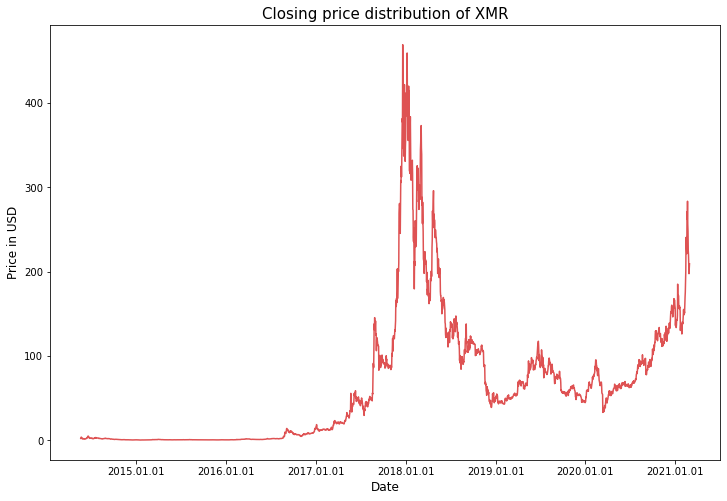

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = xmr_df.Close.values, x=xmr_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = xmr_df.Close.values, x=xmr_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of XMR", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

xmr_df['Date_mpl'] = xmr_df['Date'].apply(lambda x: mdates.date2num(x))

temp_xmr_df = xmr_df.copy(deep=False)
temp_xmr_df = temp_xmr_df.set_index(['Date'])
temp_xmr_df = temp_xmr_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_xmr_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2014-05-22,2.188880,1.359090,1.589400,2.095580,1.329180e+05,16212.0
2014-05-23,3.434370,2.051040,2.051040,2.963020,2.668520e+05,16213.0
2014-05-24,4.014240,2.617780,2.920390,3.702450,2.480280e+05,16214.0
2014-05-25,4.043030,2.803300,4.043030,3.138560,2.835450e+05,16215.0
2014-05-26,3.762350,2.312020,3.218970,3.021860,2.201480e+05,16216.0
...,...,...,...,...,...,...
2021-02-23,225.015462,171.288990,224.992714,219.531057,1.161681e+09,18681.0
2021-02-24,224.976032,198.768041,219.575963,205.749129,8.610354e+08,18682.0
2021-02-25,218.282977,197.548116,205.743357,197.548116,6.282454e+08,18683.0


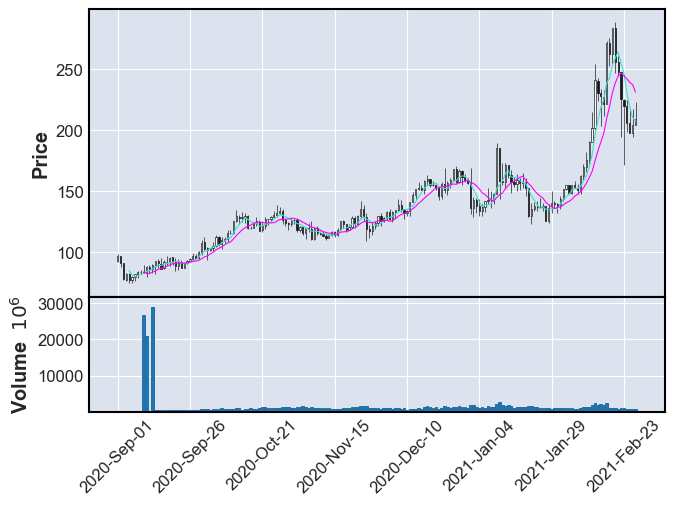

In [6]:
mpf.plot(temp_xmr_df.loc['2020-9-1':], type='candle', mav=(5,10), volume=True)

## Price prediction

In [7]:
from fbprophet import Prophet

In [8]:
INPUT_FILE = "coin_Monero.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-9-1']

m = Prophet(changepoint_prior_scale=.7)
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
182,2021-03-02 23:59:59,252.852766,235.835991,269.881879
183,2021-03-03 23:59:59,256.116934,237.672295,274.887677
184,2021-03-04 23:59:59,257.023325,239.746103,274.554156
185,2021-03-05 23:59:59,260.574038,243.425430,278.669532
186,2021-03-06 23:59:59,264.873328,247.770434,282.920596


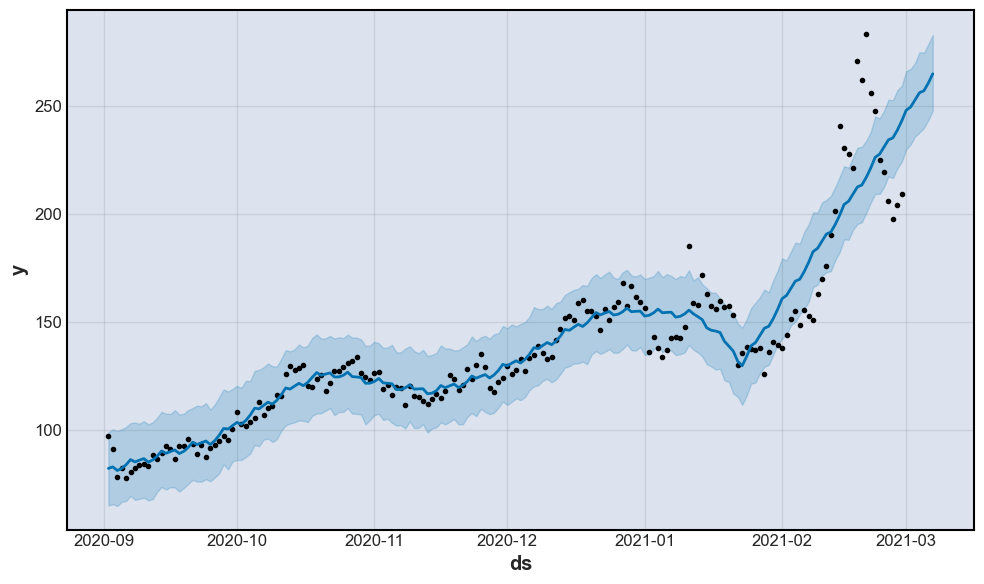

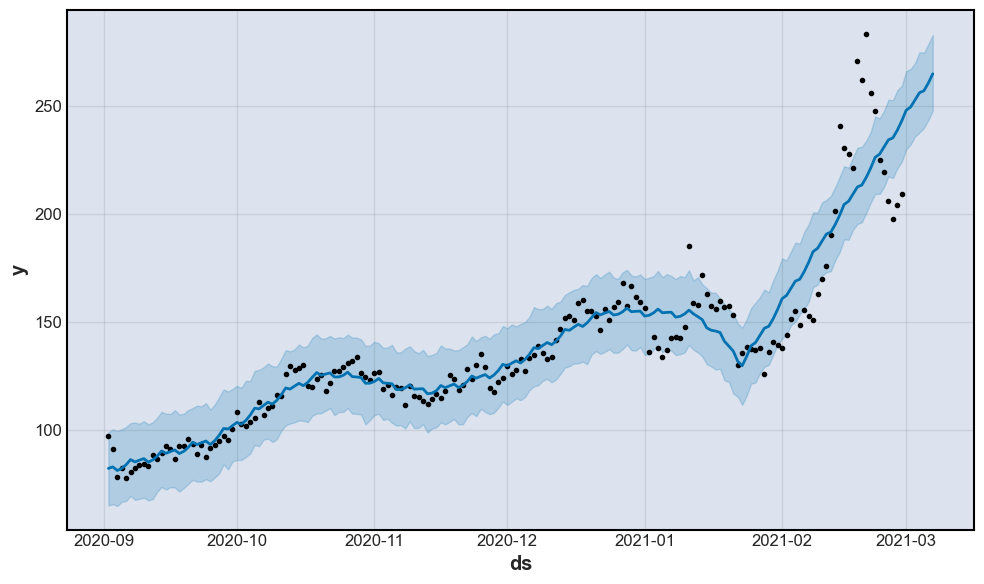

In [9]:
m.plot(forecast)

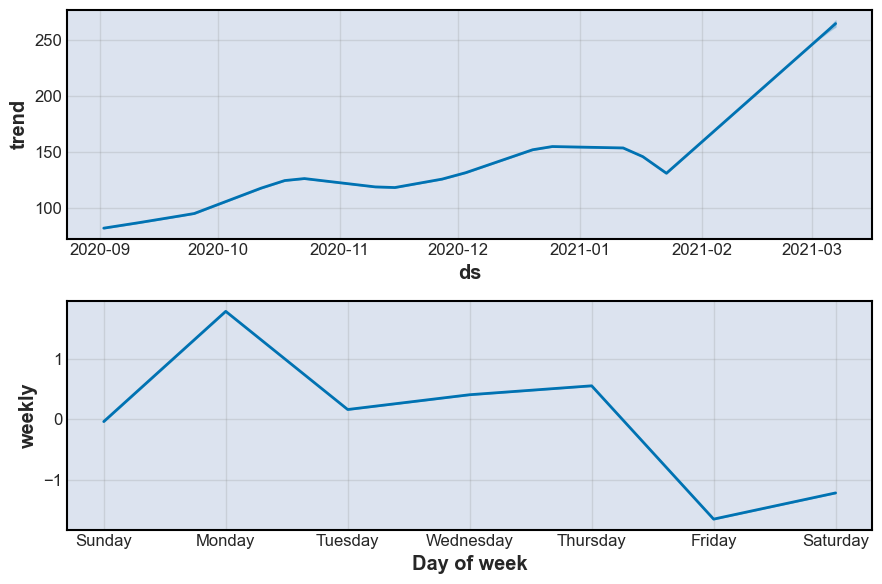

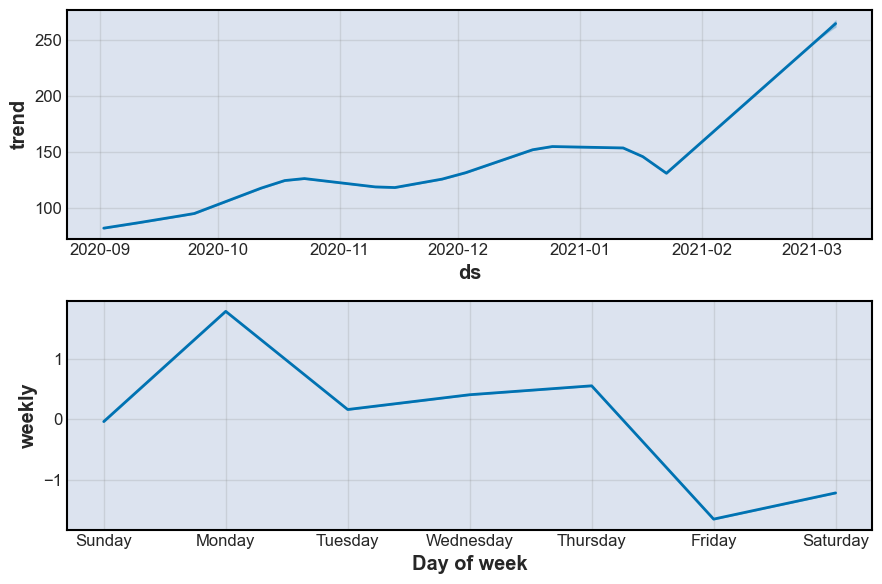

In [10]:
m.plot_components(forecast)